# Integrated Pest Management Notebook

## Introduction
It is a broad-based approach that integrates practices for economic control of pests. IPM aims to suppress pest populations below the economic injury level. It is defined as the careful consideration of all available pest control techniques and subsequent integration of appropriate measures that discourage the development of pest populations and keep pesticides and other interventions to level that are economically justified to reduce or minimize risks to human health and the environment. IPM emphasizes the growth of a healthy crop with the least possible disruption to agro-ecosystems and encourages natural pest control mechanisms. Some sectors has encouraged the adoption of IPM pest control since the 1970s.

Shortly after World War II, when synthetic insecticides became widely available, entomologists in California developed the concept of “supervised insect control”. Under this scheme, insect control was supervised by qualified entomologists and insecticide applications were based on conclusions reached from periodic monitoring of pest and natural-enemy populations. Supervised control was the base for the risen of integrated control in the 1950s.

IPM extended the concept of integrated control to all classes of pests and was expected to include all tactics. Controls such as pesticides were to be applied an in integrated control, but these now had to be compatible with tactics for all these classes of pests. Other tactics, such as host-plant resistance and cultural manipulations, became part of the IPM framework.

In the United States, IPM was formulated into national policy in February 1972 when President Richard Nixon directed federal agencies to take steps to advance the application of IPM in all relevant sectors. In 1979, President Jimmy Carter established an interagency IPM Coordinating Commitee to ensure development and implementation of IPM practices.
IPM is the selection and use of pest control actions that will ensure favourable economic, ecological and social consequences and is applicable to most agricultural, public health and amenity pest management situations. The IPM process starts with monitoring, which includes inspection and identification, followed by the establishment of economic injury levels. The economic injury levels set the economic threshold level. That is the point when pest damage (and the benefits of treating pest) exceed the cost of treatment. This can also be a threshold level for determining an unacceptable level that is not tied to economic injury. Action thresholds are more common in structural pest management and economic injury levels in classic agricultural pest management. Once threshold has been crossed by the pest population action steps need to be taken to reduce and control the pest. For conventional farms IPM can reduce human and environmental exposure to hazardous chemicals, and potentially lower overall costs.

In [127]:
from IPython.display import YouTubeVideo
YouTubeVideo("bH63UA3HVwI", height = 400, width=600)

# Rule Classification

One of the important tasks in data mining and **machine learning** is **classification**. Given a set of examples belonging to different classes we want to construct a classification model (also called classifier) that will classify examples to the correct class. The phase of constructing the model is called **learning** or **training**. It is often nearly impossible to construct a perfect classification model that would correctlly classify all examples from the test set. Therefore we have to choose a **suboptimal classification model that best suits our needs and works best on our problem domain**.

## Cost-sensitive problems
Besides tuning the thresholds of our classifier, there are other approaches you can take to aid with uneven clasification costs. There are many ways to include the cost information in classification algorithms. For example in naive Bayes, you could predict the class with the lowest expected cost instead of the class with the highest probability.

Another way to tune classifieres is to alter the data used to train the classifier to deal with imbalanced classification tasks. This is done by either undersampling or oversampling data. **Oversample** means to duplicate examples, wheresas **undersample** means delete examples. The sampling can be done either randomply or in a predeterminated fashion. For example, one approach would be to keep all of the examples from the positive class and undersample or discard examples from the negative class. One drawback of this approach is deciding which negative examples to toss out. The examples you choose to toss out could carry valuable information that isn't contained in the remaining examples.

To oversample the positive class, you could replicate the existing examples or add new points similar to the existing points. One approach is to add a data point **interpolated** between existing data points. This process can lead to **overfitting**.

Most learning schemes do not perform cost-sensitive learning: They generate the same classifier no matter what costs are assigned to the different classes.
**Simple methods for cost-sensitive learning**
* For any classifier:
    - Resampling of instances according to costs
    - proportion of instances with higher weights will be increased
* If classifier is able to handle weighted instances
    - weighting of instances according to costs
    - covered examples are not counted with 1, but with their weight
* If classifier returns a score *f* or a probability *p*
    - varying the classification threshold

In [51]:
# General imports
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sb

# Algorithms / estimators
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.learning_curve import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
from documentModel import DocumentModel as DM
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cross_validation import train_test_split
from sklearn.externals import joblib

stopWords = ['a', 'bajo', 'en', 'para','un', 'la', 'el', 'los', 'las', 'su', 'sus', 'través', 'al','con', 'más', 'muy', 'cual', 'poco', 'que']

In [4]:
print "Transforming annotated files into training datasets..."
results = {}
dm = DM()

fito_dataset = dm.vectorize(0)
X, y = fito_dataset["data"], fito_dataset["target"]
over_sampled_fito_dataset = dm.vectorize(1)
X_o , y_o = over_sampled_fito_dataset["data"], over_sampled_fito_dataset["target"]
#X_iu, y_iu = dm.vectorize(2)

(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(X, y, train_size=0.75)


(X_o_train,
 X_o_test,
 y_o_train,
 y_o_test) = train_test_split(X_o, y_o, train_size=0.75)


print "OK"

Transforming annotated files into training datasets...
OK


### Testing resampling

In [6]:
print "Normal dataset"
print np.array(X_train).shape
print np.array(X_test).shape
print y_train.shape
print y_test.shape
print "\nResample dataset (Oversampling)"
print np.array(X_o_train).shape
print np.array(X_o_test).shape
print y_o_train.shape
print y_o_test.shape

Normal dataset
(386,)
(129,)
(386,)
(129,)

Resample dataset (Oversampling)
(1050,)
(350,)
(1050,)
(350,)


### Natural language Visualizaiton

### Data set

In [52]:
rule_data = pd.DataFrame({"rule": X_train, "tag": y_train})

In [53]:
rule_data.head()

,rule,tag
0,Aplicar en espolvoreo,1
1,Cuando se formule para tratamientos de frutos ...,1
2,No aplicar aceites minerales durante los 21 dí...,0
3,Evitar que el producto caiga sobre las plantas...,0
4,No aplicar a temperaturas menores de 6 grados C,0


In [79]:
permissions = rule_data[rule_data["tag"] == 1]
prohibitions = rule_data[rule_data["tag"] == 0]

### Permissions

In [55]:
permissions.head()

,rule,tag
0,Aplicar en espolvoreo,1
1,Cuando se formule para tratamientos de frutos ...,1
5,Aplicar en pulverización normal.,1
6,Aplicar en pulverización normal al aire libre ...,1
7,"Aplicar mediante riego por goteo, solo al aire...",1


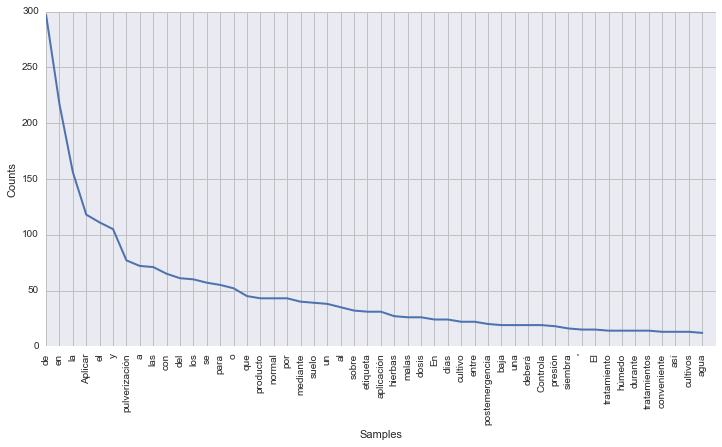

In [92]:
from nltk.tokenize import word_tokenize
stopwords = ["(",")",",","."]

per = permissions.as_matrix(["rule"])

permission_tokens = [token for sentence in per
             for token in word_tokenize(sentence[0]) if token not in stopwords]

plt.figure(figsize=(12,6))
fdist = nltk.FreqDist(permission_tokens)
fdist.plot(50)

### Prohibitions

In [80]:
prohibitions.head()

,rule,tag
2,No aplicar aceites minerales durante los 21 dí...,0
3,Evitar que el producto caiga sobre las plantas...,0
4,No aplicar a temperaturas menores de 6 grados C,0
8,No efectuar tratamientos en días de viento y t...,0
12,No aplicar en cultivos cuyos frutos sean desti...,0


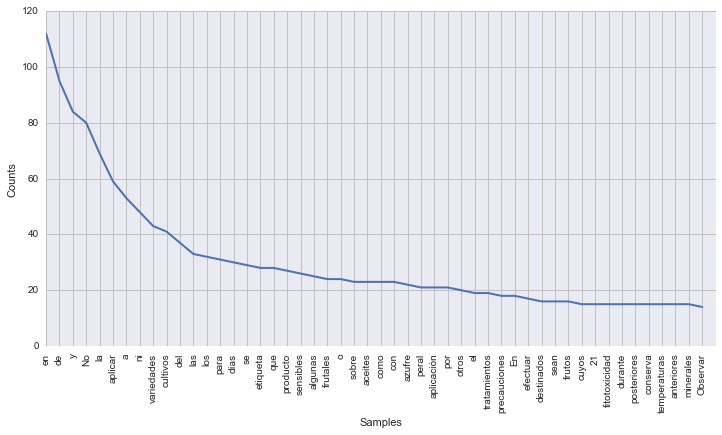

In [94]:
pro = prohibitions.as_matrix(["rule"])
prohibition_tokens = [token for sentence in pro
             for token in word_tokenize(sentence[0]) if token not in stopwords]
plt.figure(figsize=(12,6))
fdist = nltk.FreqDist(prohibition_tokens)
fdist.plot(50)

### POS Tagging

In [172]:
from nltk.corpus import cess_esp as cess
from nltk import UnigramTagger as ut
from nltk import BigramTagger as bt

# Read the corpus into a list
# each entry in the list is one sentence
cess_sents = cess.tagged_sents()

# Train the unigram tagger
uni_tag = ut(cess_sents)

In [179]:
uni_tag.tag(X[5].split(" "))

[(u'No', u'rn'),
 (u'mezclar', u'vmn0000'),
 (u'con', u'sps00'),
 (u'aceites', None),
 (u'ni', u'cc'),
 (u'productos', u'ncmp000'),
 (u'de', u'sps00'),
 (u'reacci\xf3n', u'ncfs000'),
 (u'alcalina,', None),
 (u'ni', u'cc'),
 (u'efectuar', u'vmn0000'),
 (u'tratamientos', u'ncmp000'),
 (u'a', u'sps00'),
 (u'temperaturas', u'ncfp000'),
 (u'demasiado', u'rg'),
 (u'elevadas', u'aq0fpp')]

In [180]:
from IPython.display import IFrame
IFrame("http://nlp.lsi.upc.edu/freeling/doc/tagsets/tagset-es.html", width = 800, height=400)

### Grid Search

In [161]:
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.cross_validation import StratifiedKFold
from sklearn.learning_curve import learning_curve

In [162]:
from sklearn.base import BaseEstimator

class Densifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def fit_transform(self, X, y=None):
        return self.transform(X)
    def transform(self, X, y=None):
        return X.toarray()  

In [163]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction import DictVectorizer

class RuleStats(BaseEstimator, TransformerMixin):
    "Extract features from each rule for DictVectorizer"
    
    def __init__(self,  negation_flag = True):
        self.negation_flag = negation_flag
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, sentences):
        if self.negation_flag == True:
            return [{'contains_no':  self.negations_present_(sentence)} 
                    for sentence in sentences]
        else:
            return [{'length': len(sentence)} for sentence in sentences]
    
    def negations_present_(self, sentence):
        if sentence.find("No ") != -1:
            return 1
        else: return 0

In [168]:
class BiModel:
    def __init__(self, normal_estimator, oversampled_estimator):
        self.normal_estimator = normal_estimator
        self.oversampled_estimator = oversampled_estimator

In [165]:
estimators = []

# Naïve Bayes

Naïve Bayes classifiers are a family of classifiers that are based on the popular Bayes' probability theorem. NB is probably one of the most elegant machine learning algorithms out there that is of practical use. They are known for creating simple yet well performing models, especially in the fields of document classification and disease prediction. This type of classifier ir linear and are know for being very efficient. The adjective **naive** come from the assumption that the features in the dataset are **mutually independent**. More exactly the sampres should be *i.i.d* (indepentend and identically distributed). One exaple of this behaviour would be coin tossing. In practice, the independende assumption is often violated byu the classifier still tends to perform correctly. Especially for **small datasets** naive Bayes classifiers can outperform the more powerful alternatives.

Strong violations of the independence assumption and **non-linear classification problems** (instance based such as nearest neighbors would be better) can lead to very **poor performance**. In practice, it is always recommeded to compare different classification models on the particular dataset and consider the prediction performances as well as computational efficiency. On the other hand, it proves to be quite robust to irrelevant features, which it kindly ignores. It learns fast predicts equally so. Moreover, it does not require lots of storage.

The probability model was formulated as follows

$$\text{Posterior probability} = \cfrac{\text{Conditional Probability X Prior Probability}}{\text{Evidence}}$$

If the prior are following a **uniform distribution**, the posterior probabilities will be entirely determined by the class-conditional probabilities and the evidence term. And since the evidence term is a constant, the decision rule will wntirely depend on the class-conditional probabilities. Eventually the **a priori knowledge** can be obtained by consulting a domain expert or by estimation from the training data.

The evidence usually is constant, so we can simply ignore ir without changing the winner class. However, we don't calculate any real probabilities any more. Instead, we are estimating which class is more likely, given the evidence. NB is not so much interested in the real probabilities, but only in the information, which class is more likely.

In [171]:
def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print "\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2)

## Extra: Feature Union using more semantic features

In [88]:
from sklearn.naive_bayes import MultinomialNB

pipe_test = Pipeline([
                        ('features', FeatureUnion([
                            ('linguistics', Pipeline([
                                ('vect', CountVectorizer()),
                                ('tfidf', TfidfTransformer()),
                                ])),
                            ('rule', Pipeline([
                                ('stats', RuleStats()),
                                ('vect', DictVectorizer())
                            ]))
                    ], transformer_weights={
                        'maths': 0.8,
                        'rule': 0.8
                    })),
                    ('to_dense', Densifier()),
                    ('select', SelectKBest(score_func = chi2)),
                    ('clf', MultinomialNB())])

param_grid = [{ 'features__linguistics__vect__ngram_range': [(1, 1), (1, 2), (1,3)],
                'features__linguistics__tfidf__use_idf': (True, False),
                'select__k': ['all', 10, 20 ,30],
                'features__rule__stats__negation_flag' : (True, False),
                'clf__fit_prior': (True, False),
              }]


gs_test = GridSearchCV(estimator=pipe_test,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=5,
                 n_jobs=1)


gs_test.fit(X_train, y_train)
test = gs_test.best_estimator_

In [89]:
print("Best Score: {}".format(gs_test.best_score_))
print
print("Best parameters: {}".format(gs_test.best_params_))

Best Score: 0.917098445596

Best parameters: {'select__k': 'all', 'features__linguistics__vect__ngram_range': (1, 3), 'clf__fit_prior': True, 'features__rule__stats__negation_flag': True, 'features__linguistics__tfidf__use_idf': False}


In [125]:
from sklearn.naive_bayes import MultinomialNB

pipe_nb = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('to_dense', Densifier()),
                    ('select', SelectKBest()),
                    ('clf', MultinomialNB())])

#MultinomialNB(class_prior=[.1, .9]).fit(X,y).predict([1,1])
param_grid = [{ 'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
                'tfidf__use_idf': (True, False),
                'select__score_func': [chi2],
                'select__k': ['all', 10, 20 ,30],
                'clf__fit_prior': (True, False),
              }]


cross_validation = StratifiedKFold(y_train, n_folds=5)

gs_nb = GridSearchCV(estimator=pipe_nb,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=cross_validation,
                 n_jobs=1)

cross_validation = StratifiedKFold(y_o_train, n_folds=5)

gs_nb_o = GridSearchCV(estimator=pipe_nb,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=cross_validation,
                 n_jobs=1)

gs_nb.fit(X_train, y_train)
nb = gs_nb.best_estimator_
gs_nb_o.fit(X_o_train, y_o_train)
nb_o = gs_nb_o.best_estimator_

joblib.dump(nb, 'nb.pkl')
joblib.dump(nb_o, 'nb_o.pkl')

estimators.append(BiModel(gs_nb, gs_nb_o))

['nb_o.pkl',
 'nb_o.pkl_01.npy',
 'nb_o.pkl_02.npy',
 'nb_o.pkl_03.npy',
 'nb_o.pkl_04.npy',
 'nb_o.pkl_05.npy',
 'nb_o.pkl_06.npy',
 'nb_o.pkl_07.npy',
 'nb_o.pkl_08.npy',
 'nb_o.pkl_09.npy']

In [159]:
print("Best Score: {}".format(gs_nb.best_score_))
print
print("Best parameters: {}".format(gs_nb.best_params_))
print
print("Best Score with Over-sampling: {}".format(gs_nb_o.best_score_))
print
print("Best parameters with Over-sampling: {}".format(gs_nb_o.best_params_))

Best Score: 0.922279792746

Best parameters: {'vect__ngram_range': (1, 3), 'select__score_func': <function chi2 at 0x10908b410>, 'clf__fit_prior': True, 'select__k': 'all', 'tfidf__use_idf': True}

Best Score with Over-sampling: 0.949523809524

Best parameters with Over-sampling: {'vect__ngram_range': (1, 1), 'select__score_func': <function chi2 at 0x10908b410>, 'clf__fit_prior': False, 'select__k': 'all', 'tfidf__use_idf': True}


### Visualizing accuracy distribution

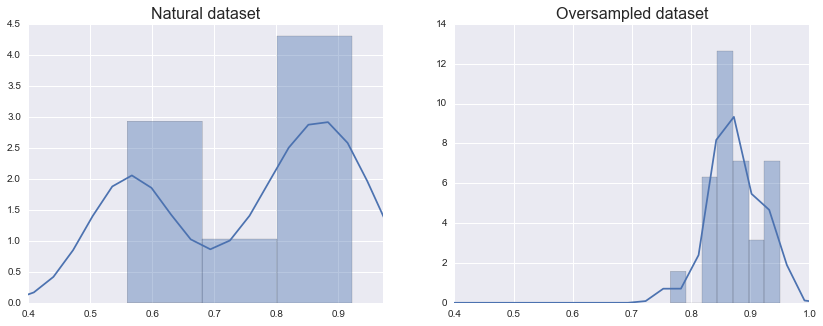

In [160]:
plt.figure(figsize=(14, 5))
grid_visualization = []
grid_visualization_o = []

for grid_pair in gs_nb.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
for grid_pair in gs_nb_o.grid_scores_:
    grid_visualization_o.append(grid_pair.mean_validation_score)    

ax = plt.subplot(1,2,1)
sb.plt.xlim(0.4, gs_nb.best_score_+ 0.05)
sb.plt.title('Natural dataset', fontsize = 16)
sb.distplot(grid_visualization)

ax = plt.subplot(1,2,2)
sb.plt.xlim(0.4, gs_nb_o.best_score_ + 0.05)
sb.plt.title('Oversampled dataset', fontsize = 16)
sb.distplot(grid_visualization_o)

## Decision Trees

The process of constructing a decision tree is loosely based on the concepts of **information entropy and information gain** from information theory. A decision tree is a graph that describes a model of decisions and their possible consequences. An internal node in a decision tree represents a decision, or rather a condition of a particular feature in the context of classification. It has two possible outcomes that are represented by the left and right subtrees of the node. Of course, a node in the decision tree coul also have more than two subtrees. Each leaf node represents a particular class.

There are actually several algorithms that are used to construct a decision tree from some training data. Generally, the tree is constructed by splitting the set of sample values in the training data into smaller subsets based on an attribute value test. The process is repeated in each subset until splitting a given subset of sample values no longer adds internal nodes to the decision tree.

Once a decision tree has been created, we can optionally perform **pruning** on the tree. Pruning is simply the process of removing any extraneous decision nodes from the tree. This can be thought as a form for the regularization of decision tree through which we prevent underfitting or overfitting of the estimated decision tree model.

**J48** is an open source implementation of the **C4.5** algorithm in Java.

**Pros** Computationally cheap to use, easy for humans to understand learned results (interpretability), missing values OK, can deal with irrelevant features.

**Cons**: Prone to overfitting

**Works with**: Numeric values and  nominal values.

### Maximizing Information Gain
We need to define an **objective function** that we want to optimize via the tree learning algorithm. In this case, the function is to maximize the **information gain** at each split. For simplicity and to reduce the combinatorial search space, most libraries (including scikit-learn) implement binary decision trees.

The three impurity criteria that are commonly used in binary decision trees are **Gini index**, **entropy**, and the **classification error**.

In practice both the Gini index and entropy typycally yoield very similar results and it is often not worth spending much time on evaluating trees using different impurity criteria rather than experimenting with different pruning cut-offs.

In [170]:
from sklearn.tree import DecisionTreeClassifier

pipe_tree = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('to_dense', Densifier()),
                    ('select', SelectKBest(score_func=chi2)),
                   # ('pca', PCA()),
                    ('clf', DecisionTreeClassifier(random_state = 0))])

param_grid = [{ 'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
                'tfidf__use_idf': (True, False),
                'select__k': ['all', 10, 20 ,30],
                #'pca__n_components': [None, 1,2,5],
                'clf__max_depth': [3, 5, 10],
                'clf__criterion': ["gini", "entropy"],
              }]


gs_dt = GridSearchCV(estimator=pipe_tree,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=5,
                 n_jobs=1)

gs_dt_o = GridSearchCV(estimator=pipe_tree,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=5,
                 n_jobs=1)

gs_dt.fit(X_train, y_train)
gs_dt_o.fit(X_o_train, y_o_train)

dt = gs_dt.best_estimator_
joblib.dump(dt, 'dt.pkl')
dt_o = gs_dt_o.best_estimator_
joblib.dump(dt_o, 'dt.pkl')

estimators.append(BiModel(gs_dt, gs_dt_o))

In [107]:
print("Best Score: {}".format(gs_dt.best_score_))
print
print("Best parameters: {}".format(gs_dt.best_params_))
print
print("Best Score: {}".format(gs_dt_o.best_score_))
print
print("Best parameters: {}".format(gs_dt_o.best_params_))

Best Score: 0.917098445596

Best parameters: {'vect__ngram_range': (1, 1), 'tfidf__use_idf': False, 'clf__criterion': 'entropy', 'clf__max_depth': 5, 'select__k': 'all'}

Best Score: 0.977142857143

Best parameters: {'vect__ngram_range': (1, 1), 'tfidf__use_idf': True, 'clf__criterion': 'entropy', 'clf__max_depth': 10, 'select__k': 'all'}


### Visualizing accuracy distribution

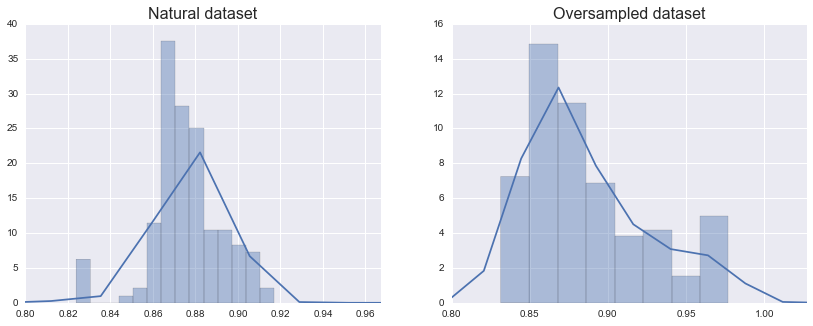

In [108]:
plt.figure(figsize=(14, 5))
grid_visualization = []
grid_visualization_o = []

for grid_pair in gs_dt.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
for grid_pair in gs_dt_o.grid_scores_:
    grid_visualization_o.append(grid_pair.mean_validation_score)    

ax = plt.subplot(1,2,1)
sb.plt.xlim(0.8, gs_dt.best_score_+ 0.05)
sb.plt.title('Natural dataset', fontsize = 16)
sb.distplot(grid_visualization)

ax = plt.subplot(1,2,2)
sb.plt.xlim(0.8, gs_dt_o.best_score_ + 0.05)
sb.plt.title('Oversampled dataset', fontsize = 16)
sb.distplot(grid_visualization_o)

In [117]:
results["dt"] = grid_visualization

### Extra: Visualizing interaction among metaparameters

In [156]:
from sklearn.tree import DecisionTreeClassifier

pipe_tree = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('to_dense', Densifier()),
                    ('select', SelectKBest()),
                    ('clf', DecisionTreeClassifier(random_state = 0))])

param_grid = [{ 'select__k': [10, 20 ,30, 100],
                'clf__max_depth': [3, 5, 10],
              }]


gs = GridSearchCV(estimator=pipe_tree,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=5,
                 n_jobs=1)

gs.fit(X_train, y_train)

print("Best Score: {}".format(gs.best_score_))
print("Best parameters: {}".format(gs.best_params_))

Best Score: 0.919689119171
Best parameters: {'clf__max_depth': 3, 'select__k': 100}


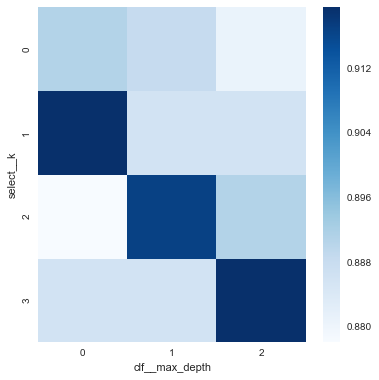

In [157]:
plt.figure(figsize=(6,6))
grid_visualization = []

for grid_pair in gs.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)

grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (4,3)
sb.heatmap(grid_visualization, cmap = 'Blues')
plt.ylabel('select__k')
plt.xlabel('clf__max_depth')

## Logistic regression

Regression means that we try to find the best-fit set parameters. Finsing the best-fit is similar to regression, and in this method it's how we train our classifier. Optimization algorithms are used to find the parametres. Logistic regression, instead of its name, is a classification model that is very easy to implement but performs very well on linearly separable classes. It is one of the most widely used algorthms for classification in industry. 

The logistic regression model is also a linear model for binary classificaiton that can be extended to multiclass classification via the OvR technique. Logistic regression can be seen as a **probabilistic model**.

**Pros**
Computationally inexpensive, easy to implement, knowledge representation easy to interpret.

**Cons**
Prone to underfitting, may have low accuracy.

**Works with**
Numeric values, nominal values

For the logistic regression classifier we 'll our features and multiply each one by a weight and then add them up. This result will be put into the sigmoid, and we'll get a number between 0 and 1. Anything above 0.5 we'll classify as a 1, and anything below 0.5 we'll classify as a 0. You can also think as a logistic regression as a probability estimate.

### Logistic Function
It is also known as sigmoid function due to its characteristic S-shape. It is the inverse form of the logit function. This funcion takes real number values as input and transform them to values in the range [0,1]. The output of the sigmoid function is then interpreted as the probability of particular sample belonging to class 1. There are many applications where we are not only interested in the predicted class labels, but the **class-membership probability**. Logistic regression can be used in weather forecasting and disease detection.

The predicted probability can then simply be coverted into a binary outcome via quatizer (unit step function).

$$y =
\left\{
    \begin{array}{ll}
        1 & \mbox{if } \phi (z) \geq 0.5 \\
        0 & otherwise
    \end{array}
\right.$$

This is also equivalent

$$y =
\left\{
	\begin{array}{ll}
		1  & \mbox{if } z \geq 0 \\
		0 &  otherwise
	\end{array}
\right.$$

In [143]:
from sklearn.linear_model import LogisticRegression

pipe_log = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('to_dense', Densifier()),
                    ('select', SelectKBest()),
                    #('pca', PCA()),
                    ('clf', LogisticRegression(random_state = 0))])

param_range = [1, 20, 50, 100]
param_grid = [{ 'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
                'tfidf__use_idf': (True, False),
                'select__score_func': [chi2],
                'select__k': [10, 20 ,30],
                #'pca__n_components': [None, 1,2,5],
                'clf__C': param_range
              }]


gs_log = GridSearchCV(estimator=pipe_log,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=5,
                 n_jobs=1)


gs_log_o = GridSearchCV(estimator=pipe_log,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=5,
                 n_jobs=1)

gs_log.fit(X_train, y_train)
gs_log_o.fit(X_o_train, y_o_train)

log = gs_log.best_estimator_
joblib.dump(log, 'log.pkl')
log_o = gs_log_o.best_estimator_
joblib.dump(log_o, 'log_o.pkl')

['log_o.pkl',
 'log_o.pkl_01.npy',
 'log_o.pkl_02.npy',
 'log_o.pkl_03.npy',
 'log_o.pkl_04.npy',
 'log_o.pkl_05.npy',
 'log_o.pkl_06.npy']

In [144]:
print("Best Score: {}".format(gs_log.best_score_))
print
print("Best parameters: {}".format(gs_log.best_params_))
print("Best Score: {}".format(gs_log_o.best_score_))
print
print("Best parameters: {}".format(gs_log_o.best_params_))

Best Score: 0.911917098446

Best parameters: {'vect__ngram_range': (1, 1), 'select__k': 30, 'select__score_func': <function chi2 at 0x10908b410>, 'clf__C': 50, 'tfidf__use_idf': False}
Best Score: 0.922857142857

Best parameters: {'vect__ngram_range': (1, 2), 'select__k': 30, 'select__score_func': <function chi2 at 0x10908b410>, 'clf__C': 100, 'tfidf__use_idf': False}


### Visualizing accuracy distribution

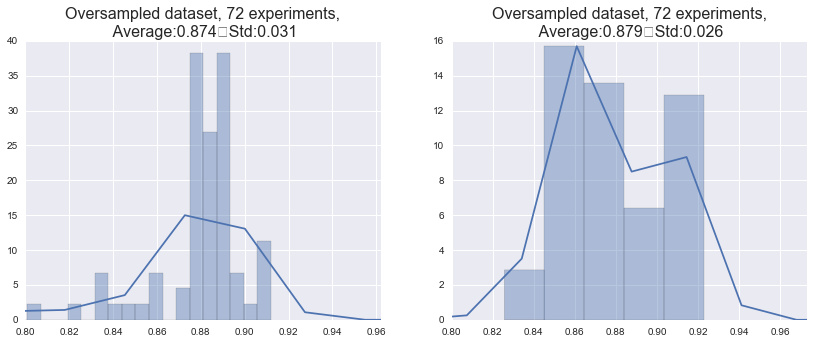

In [154]:
plt.figure(figsize=(14, 5))
grid_visualization = []
grid_visualization_o = []

for grid_pair in gs_log.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
for grid_pair in gs_log_o.grid_scores_:
    grid_visualization_o.append(grid_pair.mean_validation_score)    

ax = plt.subplot(1,2,1)
sb.plt.xlim(0.8, gs_log.best_score_+ 0.05)
sb.plt.title('Oversampled dataset, %d experiments,\n Average:%.3f\tStd:%.3f' % 
             (len(grid_visualization), np.mean(grid_visualization),
                         np.std(grid_visualization)), fontsize = 16)
sb.distplot(grid_visualization)

ax = plt.subplot(1,2,2)
sb.plt.xlim(0.8, gs_log_o.best_score_ + 0.05)
sb.plt.title('Oversampled dataset, %d experiments,\n Average:%.3f\tStd:%.3f' % 
             (len(grid_visualization_o), np.mean(grid_visualization_o),
                         np.std(grid_visualization_o)), fontsize = 16)
sb.distplot(grid_visualization_o)

In [114]:
results["log"] = grid_visualization

## Neural Networks

Sometimes it's impossible to model the dependent variable Y as a linear equation of the independent variable X. We could model the dependent variable Y to be a high order polynomial equation of the dependent variable X, thus converting the problem into the standard form of linear regressions.

It can also be seing that calculating the weights or coefficients of all the terms in a polynomial function using gradiend descent has a time complexity of O(n^2), where n is the numer of features in the training data. Similarly, the algorithmic complexity of calculating the coefficients of all the terms in a third-order polynomial equation is O(n^3). It's apparent that the time complexity of gradient descent increases geomtrically with the number of features of the model. Thus, gradient descent on its own is not efficient enough yo model nonlinear regression models with a large number of features.

ANNs, on the other hand, are very efficient at modeling nonlinear regression models of data with a high number of features. ANNs are modeled form the behavior of the central nervous system of organisms. The brain processes information and generates electric signals that are transported thorugh the network of neural fibers to the various organs of the organism. **The actual processing of sensoty signals, however, is performed by several complex combinations of these neurons**. Of course, each neuron is capable of preocessing an exremely small portion og the information preocessed by the brain.

The dendrites are used to receive signals from other neuros and can be thought of as the input to the neuron. Similarly, the axon the the neuron is analougous to the output of the neuron. The neuron can thus be mathematically represented as a function that processes several inputs and produces a single output. The interconnecting space between two neurons is called a **synapse**.

**Perceptron** can be used on its own and is effective enough to estimate supervised machine learning models such as **linear regression** and **logistic regression**. However, complex nonlinear data can be better modeled with several interconnected perceptrons. The **problem** is that it never converges if the classes are not perfectly linearly separable. Although it's possible to change the learning rate and increase the number of epochs, the perceptron will never converge.

ANNs can be braoadly classified into **feed-forward neural networks** and **recurrent neural networks**. The difference between these two types of ANNs is that in feed-forward neural networks, the conections between nodes ot the ANN do not form a directed cycle as opposed yo recurrent neural networks where the node interconnections do form a directed cycle. Thus, in feed-forward neural networks, each node in a given layer of the ANN receives input only from the nodes in the immediate previous layer of the ANN.

In [111]:
from sklearn.linear_model import Perceptron

pipe_ann = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('to_dense', Densifier()),
                    ('select', SelectKBest()),
                    ('pca', PCA()),
                    ('clf', Perceptron(random_state=1))])

param_grid = [{ 'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
                'tfidf__use_idf': (True, False),
                'select__score_func': [chi2],
                'select__k': [10, 20 ,30],
                'pca__n_components': [None, 1,2,5],
                #'clf__C': param_range
              }]


gs_ann = GridSearchCV(estimator=pipe_ann,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=5,
                 n_jobs=1)

gs_ann.fit(X_train, y_train)

print("Best Score: {}".format(gs_ann.best_score_))
print
print("Best parameters: {}".format(gs_ann.best_params_))

ann = gs_ann.best_estimator_
joblib.dump(ann, 'ann.pkl')

Best Score: 0.870466321244

Best parameters: {'vect__ngram_range': (1, 1), 'tfidf__use_idf': False, 'pca__n_components': 5, 'select__score_func': <function chi2 at 0x108e7a410>, 'select__k': 30}


['ann.pkl',
 'ann.pkl_01.npy',
 'ann.pkl_02.npy',
 'ann.pkl_03.npy',
 'ann.pkl_04.npy',
 'ann.pkl_05.npy',
 'ann.pkl_06.npy',
 'ann.pkl_07.npy',
 'ann.pkl_08.npy',
 'ann.pkl_09.npy',
 'ann.pkl_10.npy']

### Visualizing accuracy distribution

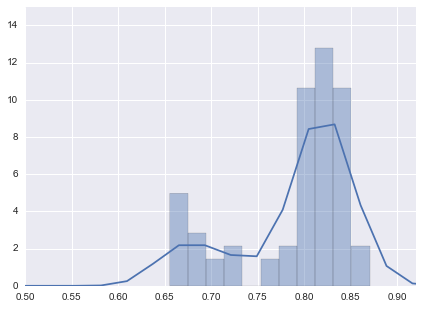

In [114]:
plt.figure(figsize=(7, 5))
grid_visualization = []

for grid_pair in gs_ann.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)

sb.plt.ylim(0,15)
sb.plt.xlim(0.5, gs_ann.best_score_ + 0.05)    
sb.distplot(grid_visualization)

In [123]:
results["ann"] = grid_visualization

## Support Vector Machines

It is considered to be the best stock (not modified) classifier. This means you can take the classifier in its basic form and run it on the data, and the results will have low error rates. SVMs are supervised learning models fot both regression and classification. SVMs find applications in text mining, chemical classification, and image and handwriteing recognition. In the simples form, a SVM separates and predicts two classes of data by estimating the optimal vector plane or hyperplane between these two classes represented in vector space. 

A basic SVM is a non-probabilistic binary classifier that uses linear classification. SVMs can also be used to perform nonlinear classification over several classes. SVM often have a good generalization performance and also implement a kind of automatic complexity control to avoid overfitting. Hence SVMs are also called **large amrgin classifiers**.

Another interesting fact about SVM is that they scale very well with the number of features being modeled and thus, SVMs are often used in machine learning problems that deal with a **large number of features**.

**Pros**
Low generalization error, computationally inexpensivem easy to repeat results

**Cons**
Sensitive to tuning parameters and kernel choice; natively only handles binary classifivation.

**Works with**
Numeric values, nominal values

### Separating data with the maximum margin

We need an **hyperplane** to separate the data. The hyperplane is the decision boundary. We'd like to find the point closest to the separating line as possible. This is known as **margin**. We want to have the greatest possible margin, because if we made a mistake trained our classifier on limited data, we'd like to be as robust as possible. SVM try to maximizae the maring by solving a quadratic optimization problem. The SMO algorithm allows tast training of SVMs by optimizing only two alphas at a time. 

The points closest to the separating hyperplane are known as **support vectors**. Now tha we know that we're trying to maximize the distance from the separating line to suppor vectors, we need to finde a way to optimize the problem.

What happens if data is not linearly separable? We 're going to use something called a **kernel** to transform data into a form that's easily understood by the classifier. This can be called as *mapping from one feature space to another feature space*. Usually, his mapping goes from a lower dimensional feature space to a higher-dimensional space. This mapping is done by the kernel. After making the substitution, we can go about solving this linear problem in high-dimensional space, which is equivalent to solving a nonlinear problem in low-dimensional space. Replacing the inner product with a kernel is known as the *kernel trick of kernel substitution*. The *radial-bias* function is a popular kernel that measures the distance between two vectors.

SVM are a **binary classifier** and additional methids can be extended to classification of classes greater than two. The performance of an SVM is also sensitive to classification parameters and parameters of the kernel used.

In [115]:
from sklearn.svm import SVC

pipe_svc = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('to_dense', Densifier()),
                    ('select', SelectKBest()),
                    ('pca', PCA()),
                    ('clf', SVC(random_state=1, probability=True))])

param_range = [0.0001, 0.001, 0.01, 0.01, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{ 'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
                'tfidf__use_idf': (True, False),
                'select__score_func': [chi2],
                'select__k': [10, 20 ,30],
                'pca__n_components': [None, 1,2,5],
                #'clf__C': param_range,
                'clf__kernel': ['linear', 'rbf']
              }]


gs_svm = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=5,
                 n_jobs=1)

gs_svm.fit(X_train, y_train)

print("Best Score: {}".format(gs_svm.best_score_))
print
print("Best parameters: {}".format(gs_svm.best_params_))

svm = gs_svm.best_estimator_
joblib.dump(svm, 'svm.pkl')

Best Score: 0.90414507772

Best parameters: {'vect__ngram_range': (1, 1), 'pca__n_components': None, 'select__k': 30, 'select__score_func': <function chi2 at 0x108e7a410>, 'tfidf__use_idf': False, 'clf__kernel': 'linear'}


['svm.pkl',
 'svm.pkl_01.npy',
 'svm.pkl_02.npy',
 'svm.pkl_03.npy',
 'svm.pkl_04.npy',
 'svm.pkl_05.npy',
 'svm.pkl_06.npy',
 'svm.pkl_07.npy',
 'svm.pkl_08.npy',
 'svm.pkl_09.npy',
 'svm.pkl_10.npy',
 'svm.pkl_11.npy',
 'svm.pkl_12.npy',
 'svm.pkl_13.npy',
 'svm.pkl_14.npy',
 'svm.pkl_15.npy',
 'svm.pkl_16.npy',
 'svm.pkl_17.npy']

### Visualizing accuracy distribution

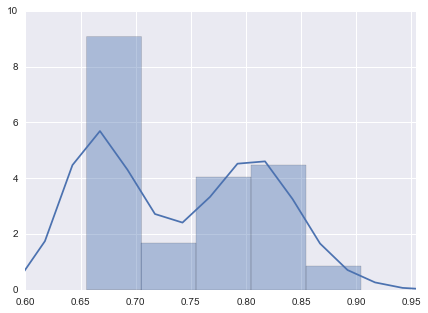

In [118]:
plt.figure(figsize=(7, 5))
grid_visualization = []

for grid_pair in gs_svm.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)

sb.plt.ylim(0,10)
sb.plt.xlim(0.60, gs_svm.best_score_ + 0.05)    
sb.distplot(grid_visualization)

In [126]:
results["svm"] = grid_visualization

## Nearest Neighbors

The principle behind nearest neighbor is to find a predefined number of training samples closest in distance to the new data, and predict its label. The number of samples can be a user-defined-constant, or vary in the local density points (radius-based neighbor learning). This distance can be any metric, although standard Euclidean distance is the most popular choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they don't create a model, but remember the training set. Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it doesn't tries to construct a model, but simply stores instances of the training data. Classification is computed from a single majority vote of the nearest neighbors of each point.

Despite its simplicity, nearest neighbors has been successfull in a large number of **classification and regression problems**. Being a non-parametric mehod, it is often **successful in classification situations where the decision boundary is very irregular**.


In [119]:
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('to_dense', Densifier()),
                    ('select', SelectKBest(score_func=chi2)),
                    ('pca', PCA()),
                    ('clf', KNeighborsClassifier())])

param_grid = [{ 'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
                'tfidf__use_idf': (True, False),
                #'select__score_func': [chi2],
                'select__k': [10, 20 ,30],
                'pca__n_components': [None, 1,2,5],
                'clf__n_neighbors': [1, 5, 10, 20]
              }]


gs_knn = GridSearchCV(estimator=pipe_knn,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=5,
                 n_jobs=1)

gs_knn.fit(X_train, y_train)

print("Best Score: {}".format(gs_knn.best_score_))
print
print("Best parameters: {}".format(gs_knn.best_params_))

knn = gs_knn.best_estimator_
joblib.dump(knn, 'knn.pkl')

Best Score: 0.911917098446

Best parameters: {'vect__ngram_range': (1, 1), 'tfidf__use_idf': True, 'pca__n_components': None, 'select__k': 30, 'clf__n_neighbors': 1}


['knn.pkl',
 'knn.pkl_01.npy',
 'knn.pkl_02.npy',
 'knn.pkl_03.npy',
 'knn.pkl_04.npy',
 'knn.pkl_05.npy',
 'knn.pkl_06.npy',
 'knn.pkl_07.npy',
 'knn.pkl_08.npy',
 'knn.pkl_09.npy',
 'knn.pkl_10.npy',
 'knn.pkl_11.npy',
 'knn.pkl_12.npy',
 'knn.pkl_13.npy',
 'knn.pkl_14.npy',
 'knn.pkl_15.npy',
 'knn.pkl_16.npy',
 'knn.pkl_17.npy']

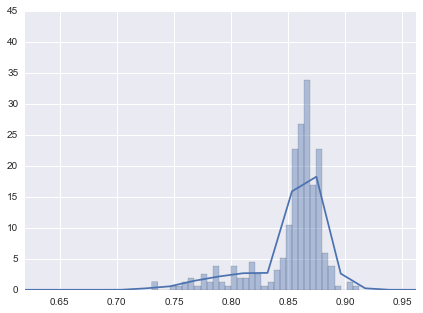

In [120]:
plt.figure(figsize=(7, 5))
grid_visualization = []

for grid_pair in gs_knn.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)

sb.plt.ylim(0,45)
sb.plt.xlim(0.62, gs_knn.best_score_ + 0.05)    
sb.distplot(grid_visualization)

In [131]:
results["knn"] =  grid_visualization

## Bagging
Bootstrap aggregating, which is known as bagging, is a technique where the data is trak from the original dataset S times to make S new datasets. The datasets are the same size as the original. Each dataset is built by randomly selecting an example from the original with replacement. It means, yo can select the same example more than once.

After the S datasets are built, a learning algorithm is applied to each one individually. When you'd like to classify a new piece of data, you'd apply our S classifiers to the new piece of data and take a majority vote. There are more advanced methods of bagging such as **random forests**. 

### Random Forest classifiers
They work around that overfitting limitation by creating a whole bunch of decision trees (hence"forest") - each trained on random subsets of training samples (drawn with replacement) and featuers (drawn without replacement) - and have the decision trees work together to make a more accurate classification.

Random forests excels when there's hundreds of possible features to look at.

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold

pipe_rfc = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('to_dense', Densifier()),
                    ('select', SelectKBest(score_func=chi2)),
                    ('pca', PCA()),
                    ('clf', RandomForestClassifier())])

param_grid = [{ 'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
                'tfidf__use_idf': (True, False),
#                'select__score_func': [chi2],
                'select__k': [15, 20 ,30],
                #'pca__n_components': [None, 5, 10],
                'clf__criterion': ['gini', 'entropy'],
                'clf__n_estimators': [5, 10, 25, 50],
#                'clf__max_features': [1, 2, 3, 4]
              }]


cross_validation = StratifiedKFold(X_train, n_folds=10)

gs_rfc = GridSearchCV(estimator=pipe_rfc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=5,
                 n_jobs=1)

gs_rfc.fit(X_train, y_train)

print("Best Score: {}".format(gs_rfc.best_score_))
print
print("Best parameters: {}".format(gs_rfc.best_params_))

rfc = gs_rfc.best_estimator_
joblib.dump(rfc, 'rfc.pkl')

Best Score: 0.906735751295

Best parameters: {'vect__ngram_range': (1, 1), 'tfidf__use_idf': True, 'clf__criterion': 'gini', 'select__k': 30, 'clf__n_estimators': 25}


['rfc.pkl',
 'rfc.pkl_01.npy',
 'rfc.pkl_02.npy',
 'rfc.pkl_03.npy',
 'rfc.pkl_04.npy',
 'rfc.pkl_05.npy',
 'rfc.pkl_06.npy',
 'rfc.pkl_07.npy',
 'rfc.pkl_08.npy',
 'rfc.pkl_09.npy',
 'rfc.pkl_10.npy',
 'rfc.pkl_11.npy',
 'rfc.pkl_12.npy',
 'rfc.pkl_13.npy',
 'rfc.pkl_14.npy',
 'rfc.pkl_15.npy',
 'rfc.pkl_16.npy',
 'rfc.pkl_17.npy',
 'rfc.pkl_18.npy',
 'rfc.pkl_19.npy',
 'rfc.pkl_20.npy',
 'rfc.pkl_21.npy',
 'rfc.pkl_22.npy',
 'rfc.pkl_23.npy',
 'rfc.pkl_24.npy',
 'rfc.pkl_25.npy',
 'rfc.pkl_26.npy',
 'rfc.pkl_27.npy',
 'rfc.pkl_28.npy',
 'rfc.pkl_29.npy',
 'rfc.pkl_30.npy',
 'rfc.pkl_31.npy',
 'rfc.pkl_32.npy',
 'rfc.pkl_33.npy',
 'rfc.pkl_34.npy',
 'rfc.pkl_35.npy',
 'rfc.pkl_36.npy',
 'rfc.pkl_37.npy',
 'rfc.pkl_38.npy',
 'rfc.pkl_39.npy',
 'rfc.pkl_40.npy',
 'rfc.pkl_41.npy',
 'rfc.pkl_42.npy',
 'rfc.pkl_43.npy',
 'rfc.pkl_44.npy',
 'rfc.pkl_45.npy',
 'rfc.pkl_46.npy',
 'rfc.pkl_47.npy',
 'rfc.pkl_48.npy',
 'rfc.pkl_49.npy',
 'rfc.pkl_50.npy',
 'rfc.pkl_51.npy',
 'rfc.pkl_52.npy',


### Visualizing accuracy distribution

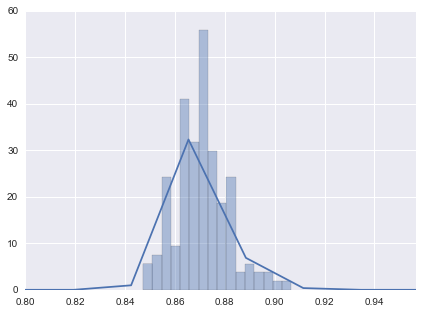

In [122]:
plt.figure(figsize=(7, 5))
grid_visualization = []

for grid_pair in gs_rfc.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)

sb.plt.ylim(0,60)
sb.plt.xlim(0.80, gs_rfc.best_score_ + 0.05)    
sb.distplot(grid_visualization)

In [134]:
results["rfc"] = grid_visualization

#### Own Businee Rule Model based on Language exploring

In [119]:
from sklearn.base import BaseEstimator, ClassifierMixin

class RuleClassifier(BaseEstimator, ClassifierMixin):  

    def __init__(self, word_list):
        """
        Called when initializing the classifier
        """
        self.word_list = word_list


    def fit(self, X, y=None):
        """
          In this case, no model is created
        """
        return self

    def _meaning(self, x):
        # returns True/False according to fitted classifier
        # notice underscore on the beginning
        for word in word_list:
            if word in x:
                return True
        return False

    def predict(self, X, y=None):
        return([self._meaning(x) for x in X])

    def score(self, X, y=None):
        # counts number of values bigger than mean
        return(sum(self.predict(X))) 

In [124]:
word_list = ["No", "aplicar", "ni", "variedades"] # Some important words in prohibitions
rule_classifier = RuleClassifier(word_list)
rule_classifier.score(X_test, y_test)/float(len(y_test))

0.29457364341085274

### All together

In [165]:
df = pd.DataFrame(columns=('accuracy', 'model'))

for model in results.iterkeys():
    df_aux = pd.DataFrame()
    df_aux["accuracy"] = results[model]
    df_aux["model"] = [model] * len(results[model])
    df = df.append(df_aux)

## Summary

In [178]:
df.describe()

,accuracy
count,1200.000000
mean,0.838405
std,0.074265
min,0.549223
25%,0.849741
50%,0.867876
75%,0.875648
max,0.924870


## Box plot

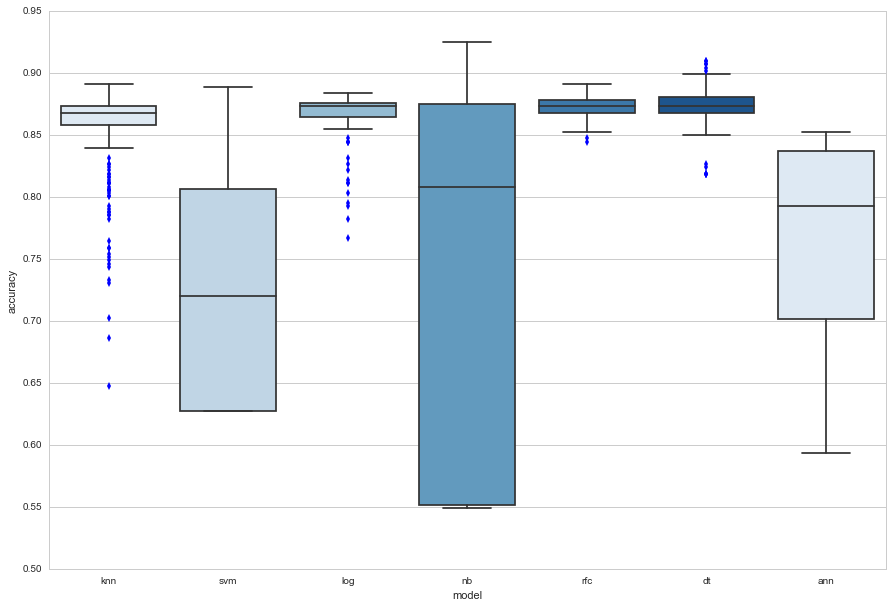

In [186]:
plt.figure(figsize=(15,10))
sb.boxplot(x="model", y="accuracy", data=df, palette = sb.color_palette("Blues"))

### Violin Plot

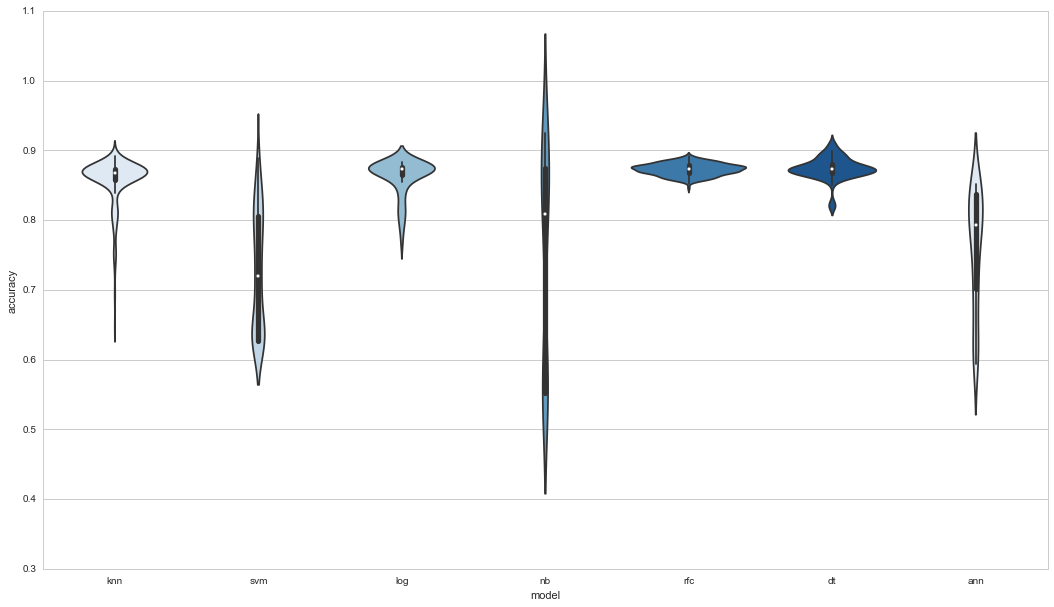

In [391]:
plt.figure(figsize=(18,10))
sb.violinplot(x="model", y="accuracy", data=df, palette = sb.color_palette("Blues"))

In [28]:
def plot_learning_curve(estimators, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    subplots = [121,122]
    plt.figure(figsize=(15,5))
    for index, estimator in enumerate(estimators):
        plt.subplot(subplots[index])
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

        plt.legend(loc="best")
    plt.show()

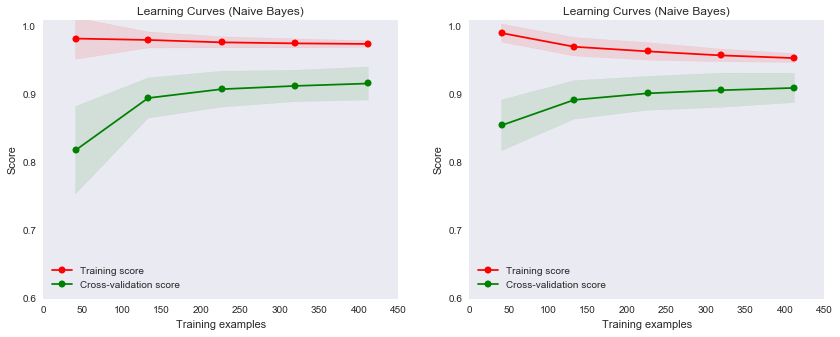

In [29]:
from sklearn import cross_validation
from sklearn.naive_bayes import MultinomialNB

title = "Learning Curves (Naive Bayes)"

cv = cross_validation.ShuffleSplit(np.array(X).shape[0], n_iter=100,
                                   test_size=0.2, random_state=0)
estimators = [nb, nb_o]
plot_learning_curve(estimators, title, X, y, ylim=(0.6, 1.01), cv=cv, n_jobs=1)

## Evaluation

**Every application is different**. We cannot offer a single evaluation metric that is right for any classification problem, or regression problem, or whatever problem you may encounter. Ther term **machine learning diagnostic** is often used to describe a test that can be run to gain insight about what is and isn't working in a machine learning model. Generally, when designing a machine laerning model,it's advisable to formulate a diagnostic for the model in parallel.

Another interesting aspect of machine learning is that without knowing the nature of the data we are trying to fit, we can make no assumption about which machine learning model we can use to fit the sample data. The axiom is known as the **No Free Lunch** theorem: "Wothout prior assumptions about the nature of a learning algorithm, no learning algorithm is superior or inferior to any other (or even random guessing)".

Minimizing the error or cost function of a formulated machine learning model is generally not enough to determine how well the model fits the supplied training data.

An estimated model is said to be **underfit** if it exhibits a large error in prediction. However, a formulated model with low error or cost function could also indicate that model doesn't understand the underlying relationship between the given features of the model. Rather, **the model is memorizing** the supplied data, and this known as **overfitting**. 

**An underfit model is also said to exhibit high bias and a overfit is said to have a high variance**. A model that describes a good fit for the sample data will have low overal error and can predict the dependent variable correctly from previously unseen values for the independent variables in our model.

It is useful to think of a **positive example** as one worth of atterntion or **alarm**, and a negative example as uninteresting or benign.

Some evaluations of classifier performances in a cost-sensitive setting are straightforward if the **opearing conditions** (misclassificaiton costs and class distributions) are **fixed and known**. When this is not the case, evaluation requires a method of visualizing classifier performance across the full range of possible operating conditions.

In binary classification, there are just two types of error of a classifeir can make: a **false positive** and a **false negative**. In general the cost of of making ony type of misclassifcation will be diferent.

Methods for evaluating the performance of classifiers can be **numerical or graphical**. Numerical evaluations produce a single number sumarzing a classifier's performance, whereas graphical mehods depict performance in a plot that can be inspected by humans. These latter methods can present a classifier's actual performance for a wide variety of different points, whereas a numerical measure only represent the average performance across a set of operating points.

#### Numerical methods
* Accuracy
* Expected benefit/cost
* Precision
* Recall
* Area under a performance curve
* ...

#### Graphical methods
* ROC Curves
* Precision-Recall Curves
* DET curves
* Regret graphs
* Loss difference plots
* Skill plots
* ...

#### TP Rate
$$\text{TP Rate} = \cfrac{\text{True Positives}}{\text{Positives}}$$

#### FN Rate
$$\text{FP Rate} = \cfrac{\text{False Negatives}}{\text{Positives}}$$

#### FP Rate
$$\text{FP Rate} = \cfrac{\text{False Positives}}{\text{Negatives}}$$

#### TN Rate
$$\text{TN Rate} = \cfrac{\text{True Negatives}}{\text{Negatives}}$$

#### Accuracy
$$\text{Accuracy} = \cfrac{\text{True Positives + True Negatives }}{\text{Postives + Negatives}}$$

#### Precision

$$\text{Precision} = \cfrac{\text{True Positives}}{\text{True Positives / False Positives}}$$

#### Recall

$$\text{Recall} = \cfrac{\text{True Positives}}{\text{True Positives / False Negatives}}$$

### Evaluation of discrete classifiers

A discrete classifier is one that outputs only a class label. Each discrete classifier produces an (fp rate, tp rate) pair corresponding to a single point in ROC space. Many classifiers, such as decision tree or rule sets, are designed to produce only a class decision on each instance. When such a discrete classifier is applied to a test set, it yields **a single confusion matrix**, which in turns corresponds to one ROC point. Thus, a discrete classifier produces only a single point in ROC space. However, some classifiers such as Naive Bayes classifier or a neural network, naturally yield an instance probability or score, a numeric value that represents the degree to which an instance is a member of a class. These values can be strict probabilities, in which case they adhere to standard theorems of probability; or they can be general, uncalibrated scores, in which case the only property that holds is that a higher score indicates a higher probability. We shall call both **probabilistic** classifier, in spite of the fact that the output may not be a proper probability.

In [123]:
target_names = ["prohibition", "permission"]

print "==================== NAIVE BAYES ==============================="
print classification_report(y_test, nb.predict(X_test), target_names = target_names)
print "==================== LOGISTIC REGRESSION ==========================="
print classification_report(y_test, log.predict(X_test), target_names = target_names)
print "==================== DECISION TREE ==========================="
print classification_report(y_test, dt.predict(X_test), target_names = target_names)
print "==================== PERCEPTRON ==============================="
print classification_report(y_test, ann.predict(X_test), target_names = target_names)
print "==================== SUPPORT VECTOR MACHINES ========================="
print classification_report(y_test, svm.predict(X_test), target_names = target_names)
print "==================== NEAREST NEIGHBORS ==============================="
print classification_report(y_test, knn.predict(X_test), target_names = target_names)
print "==================== RANDOM FORESTS ==============================="
print classification_report(y_test, rfc.predict(X_test), target_names = target_names)

==================== NAIVE BAYES ===============================
             precision    recall  f1-score   support

prohibition       0.86      0.95      0.90        44
 permission       0.97      0.92      0.95        85

avg / total       0.93      0.93      0.93       129

==================== LOGISTIC REGRESSION ===========================
             precision    recall  f1-score   support

prohibition       0.93      0.89      0.91        44
 permission       0.94      0.96      0.95        85

avg / total       0.94      0.94      0.94       129

==================== DECISION TREE ===========================
             precision    recall  f1-score   support

prohibition       0.84      0.95      0.89        44
 permission       0.97      0.91      0.94        85

avg / total       0.93      0.92      0.92       129

==================== PERCEPTRON ===============================
             precision    recall  f1-score   support

prohibition       0.46      1.00      0.

### Confusion Matrix
To evaluate a classifier properly to understand the notion of **class confusion** is necessary to use the confusion matrix. It is a kind of contingency matrix. A confusion matrix separates the decision made by the classifier, making explicit how one class is being confused for another. In the confusion matrix, the main diagonal contains the counts of correct decisions. Confusion matrix is also known as **error matrix**.

For different cut-off values, any model would exhibit different performances; thus, contingency tables could be used as a mean of assesment of competing models only for a given cutoff value. In order to represent the model performance for allposible cut-off values, the most popular graphic representations are the CAP and ROC curves.

In [141]:
def draw_confusion_matrices(confusion_matrices):
    labels = ['Prohibition', 'Permission']
    pos = [421,422,423,424,425,426, 427]
    fig = plt.figure(figsize=(20,20))
    
    for i, cm in enumerate(confusion_matrices):
        cm_normalized = cm[1].astype('float') / cm[1].sum(axis=1)[:, np.newaxis]
        ax = fig.add_subplot(pos[i])
        ax.grid(False)
        cax = ax.matshow(cm_normalized, cmap=plt.cm.Reds)
        plt.title('%s\n' % cm[0], fontsize=20)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels, fontsize=12)
        ax.set_yticklabels([''] + labels, fontsize=12)
        plt.xlabel('True Class',fontsize=14)
        plt.ylabel('Predicted Class', fontsize=14)
        plt.tight_layout()
        #fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
        for i,j in ((x,y) for x in xrange(len(cm[1])) for y in xrange(len(cm_normalized[0]))):
            ax.annotate(str(float("{0:.2f}".format(cm_normalized[i][j]))), xy=(i,j), color='black', size = 18)

            
        #name = cm[0] + '.png'
        #save(name)

def compute_costs(cm_normalized, prohibition_cost = 1000, opportunity_cost = 1):
    prior_positive = 0.2
    prior_negative = 0.8
    cost = 0
    for i, x in enumerate(np.nditer(cm_normalized)):
        if i == 1: # fn
            cost += (x * prohibition_cost) * prior_positive
        elif i == 2: # fp
            cost += (x * opportunity_cost) * prior_negative
    return cost

def draw_costs_progression(confusion_matrices):
    costs = []
    max_range = 1000
    plt.figure(figsize=(14,8))
    plt.xlabel("Permission cost (Budget - Prohibition cost)")
    for cm in confusion_matrices:
        cm_normalized = cm[1].astype('float') / cm[1].sum(axis=1)[:, np.newaxis]
        costs = []
        for cost in range(max_range):
            costs.append(compute_costs(cm_normalized, max_range - cost, cost))
        
        plt.ylim([0,100])
        plt.plot(np.arange(max_range), costs, label= cm[0])
        plt.legend(loc="top right")
        
def draw_costs(confusion_matrices, prohibition_cost = 1000, opportunity_cost = 1):
    costs = []
    names = []
    bar_width = 0.35
    for cm in confusion_matrices:
        cm_normalized = cm[1].astype('float') / cm[1].sum(axis=1)[:, np.newaxis]
        names.append(cm[0])
        costs.append(compute_costs(cm[1]))
    plt.xticks(np.arange(len(names)) + bar_width, names, rotation='vertical')
    plt.bar(np.arange(len(names)), costs)
    
def draw_ROC_cuve_classifier(confusion_matrices):
    import matplotlib
    plt.figure(figsize=(14,8))
    plt.scatter([0], [1], label="perfect classification", s = 25)
    colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(confusion_matrices)))

    for cm, c in zip(confusion_matrices, colors):
        cm_normalized = cm[1].astype('float') / cm[1].sum(axis=1)[:, np.newaxis]
        costs = []
        tpr = 0
        fpr = 0
        positives = 0
        negatives = 0
        for i, x in enumerate(np.nditer(cm_normalized)):
            if i == 0: # tp
                true_positives = x
                positives += x
            if i == 1: # fn
                false_negatives = x
                positives += x
            elif i == 2: # fp
                false_positives = x
                negatives += x
            else: # tn
                negatives += x
                
        tpr = true_positives / positives
        fpr = false_positives / positives
        
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate (Recall)")
        plt.legend(loc="lower right")
        plt.ylim([0.5, 1.1])
        plt.scatter(fpr, tpr, label= cm[0], color=c, s=50)    

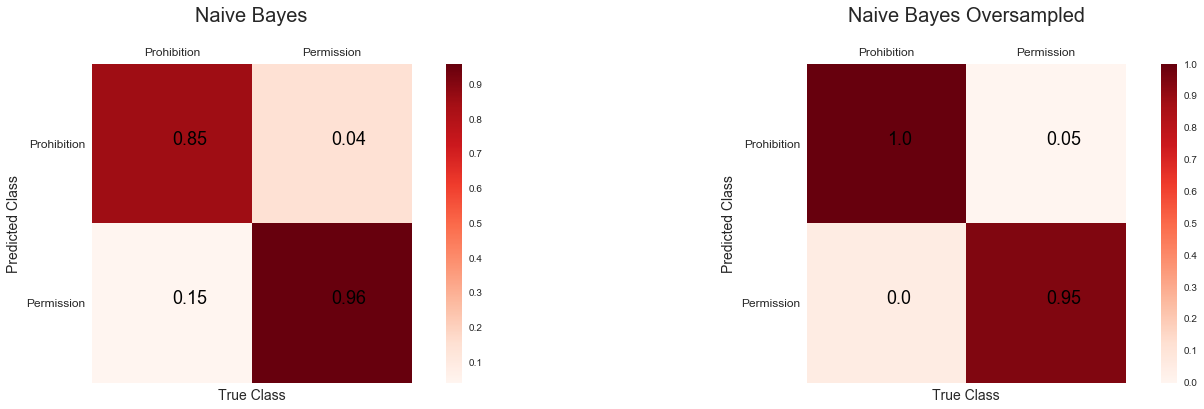

In [135]:
confusion_matrices = [
    ("Naive Bayes", confusion_matrix(y_test, nb.predict(X_test))),
    ("Naive Bayes Oversampled", confusion_matrix(y_test, nb_o.predict(X_test))),
    #("Logistic Regression", confusion_matrix(y_test, log.predict(X_test))),
    #("Decision Tree", confusion_matrix(y_test, dt.predict(X_test))),
    #("Perceptron", confusion_matrix(y_test, ann.predict(X_test))),
    #("Support Vector Machines", confusion_matrix(y_test, svm.predict(X_test))),
    #("K-Nearest Neighbor", confusion_matrix(y_test, knn.predict(X_test))),
    #("Random Forest", confusion_matrix(y_test, rfc.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

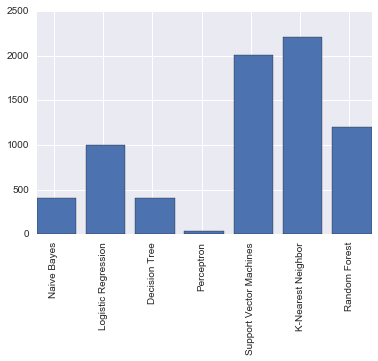

In [147]:
# 100:1 Ratio of misclassification
draw_costs(confusion_matrices, 100, 1)

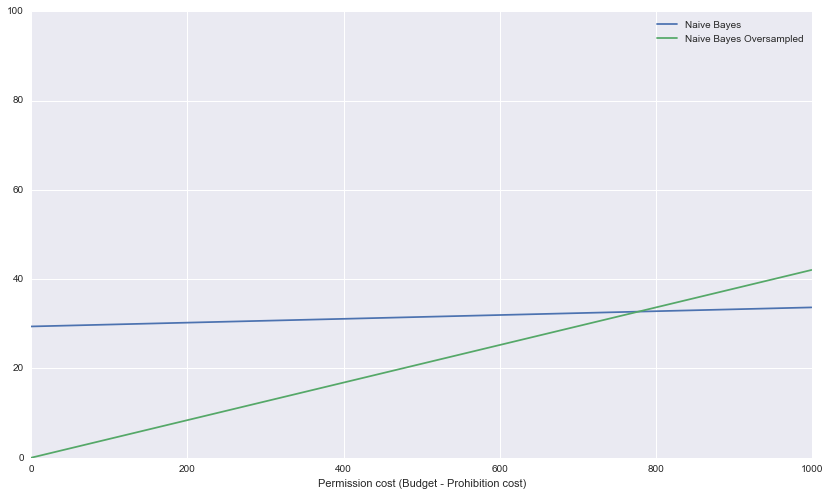

In [142]:
draw_costs_progression(confusion_matrices)

### ROC Curves

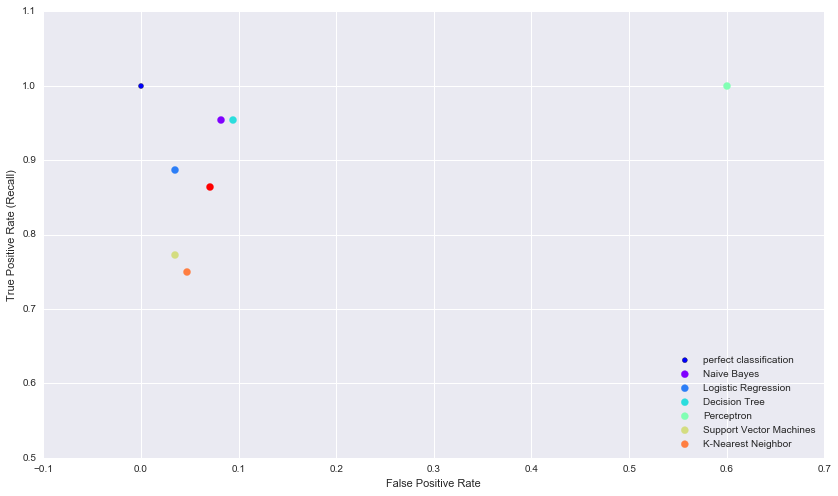

In [213]:
draw_ROC_cuve_classifier(confusion_matrices)

## Rankers / Probabilistic classifiers

Rankers can be turned into classifiers by **setting a threshold**. A probabilistic classifier and threshold *t* defines a binary classifier. By varying *t* we get a family of binary classifiers. The techniques explained below are ways to visualize the performance of the whole family. They are used to compare different families and to choose an optimal binary classifier from the family.

### ROC Curves

A receiver operating characteristics (ROC) graph is a technique for visualizing, organizing and selecting classifi- ers based on their performance. ROC curves typically feature true positive rate **(recall)** on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the **ideal point**. Although this is not very realistic, it means that a larger area under the the curve **(AUC)** is usually better. The **steepness** of the ROC is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.


Several points in ROC space are important to note. The lower left point (0,0) represents the strategy of never issuing a positive classification; such a classifier commits no false positive errors but also gains no true positives. The opposite strategy, of unconditionally issuing positive classifications, is represented by the upper right point (1,1).

Informally, the point in ROC space is better than another if it is to the northwest (tp rate is higher, fp rate is lower, or both) of the first. Classifiers appearing on the **left-hand side** of an ROC graph, near the X axis, may be thought as **conservative**: they make positive classifications only with strong evidence so they make few false positive errors, but they often have low true positive rates as well. Classifiers on the upper **right-hand side** of an ROC graph may be thought to be **liberal**: they make positive classifications with weak evidence, but they often have false positive rates. Many real world examples domains are dominated by large numbers of negative instances, so performance in the far left-hand side of the ROC graph becomes more interesting.

**Properties**
* The **curve** visualizes the quality of the ranker or probabilistic model on a test set, without commiting the classification threshold: It aggregates all possible thresholds.
* The **slope** of the curve indicates class distribution in that segment of the ranking: diagonal segment indicates locally random behaviour
* **Cocavities** indicate locally worse than random behaviour


In the case that the ROC curve of a particular model lies uniformly above the ROC curve of a competing model, the former exhibits superior discriminatory power of all possible cut-off points. In the case that the two curves intersect, it is not clear which model has the higher discriminatory power.

A drawback of the ROC curve is that they assume equal classification error costs for Type I and II Errors. 

ROC graphs are a very useful tool for visualizing and evaluating classifiers. They are able to provide a richer measure of classification performance than scalar measures such as accuracy, error rate o error cost. Because they decouple classifier performance from class skew and error costs, the have advantages over other evaluation measures such as precision-recall graphs and lift curves.

Recent years have seen an increase in the use of ROC graphs in the machine learning community, due in part to de the realization that simple classification accuracy is often a poor metric for measuring performance.

**Random Performance**

The diagonal line y = x represents the strategy of ran- domly guessing a class. For example, if a classifier ran- domly guesses the positive class half the time, it can be expected to get half the positives and half the negatives correct; this yields the point (0.5,0.5) in ROC space. If it guesses the positive class 90% of the time, it can be expected to get 90% of the positives correct but its false positive rate will increase to 90% as well, yielding (0.9,0.9) in ROC space. Thus a random classifier will produce a ROC point that slides back and forth on the dia- gonal based on the frequency with which it guesses the positive class. In order to get away from this diagonal into the upper triangular region, the classifier must exploit some information in the data.

##  AUC

The Area Under ROC Curve assesses the ranking in terms of separation of the classes

* **AUC = 1** -> All the positives before the negatives
* **AUC = 0.5** -> Random Ordering
* **AUC = 0** -> All the negatives before the positives

Concerning the AUC, a simple rule of thumb to evaluate a classifier based on this summary value is the following:

* 90-1 = very good (A)
* 80-.90 = good (B)
* 70-.80 = not so good (C)
* 60-.70 = poor (D)
* 50-.60 = fail (F)

In [206]:
def draw_ROC_curves(ROC_curves):
    plt.figure(figsize=(8,8))
    for rc in ROC_curves:
        fpr, tpr, thresholds = rc[1]

        # Compute the area under the ROC curve
        roc_auc = auc(fpr, tpr)
        #print("Area under the ROC curve : %f" % roc_auc)

        # Plot the ROC curve
        #plt.clf()
        plt.plot(fpr, tpr, label='%s (area = %0.5f)' % (rc[0], roc_auc))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([-0.1, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate (Recall)')
        plt.title('Receiver operating characteristic %s' % rc[0])
        plt.legend(loc="lower right")
        #plt.show()

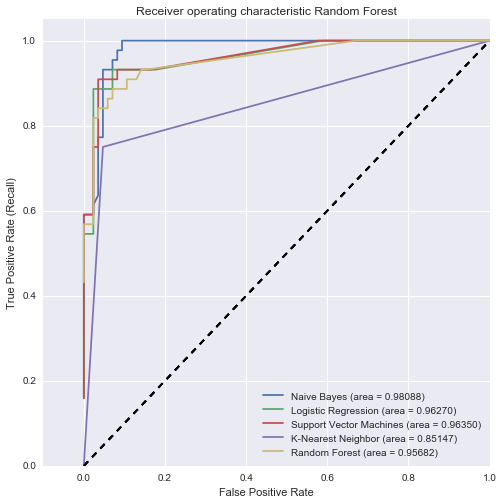

In [207]:
# ("Perceptron", roc_curve(y_test, ann.predict_proba(X_test)[::,1])),
ROC_curves = [
    ("Naive Bayes", roc_curve(y_test, nb.predict_proba(X_test)[::,0], pos_label = 0)),
    ("Logistic Regression", roc_curve(y_test, log.predict_proba(X_test)[::,0], pos_label = 0)),
    ("Support Vector Machines", roc_curve(y_test, svm.predict_proba(X_test)[::,0], pos_label = 0)),
    ("K-Nearest Neighbor", roc_curve(y_test, knn.predict_proba(X_test)[::,0], pos_label = 0)),
    ("Random Forest", roc_curve(y_test, rfc.predict_proba(X_test)[::,0], pos_label = 0))
]

draw_ROC_curves(ROC_curves)

### Detection Curves

An alternative to the ROC curve is the detection error tradeoff (DET) graph, which plots the false negative rate (missed detections) vs. the false positive rate (false alarms) on non-linearly transformed x- and y-axes. The transformation function is the quantile function of the normal distribution, i.e., the inverse of the cumulative normal distribution. It is, in fact, the same transformation as zROC, below, except that the complement of the hit rate, the miss rate or false negative rate, is used. This alternative spends more graph area on the region of interest. Most of the ROC area is of little interest; one primarily cares about the region tight against the y-axis and the top left corner – which, because of using miss rate instead of its complement, the hit rate, is the lower left corner in a DET plot. The DET plot is used extensively in the automatic speaker recognition community, where the name DET was first used. The analysis of the ROC performance in graphs with this warping of the axes was used by psychologists in perception studies halfway the 20th century, where this was dubbed "double probability paper"

In [109]:
def draw_detection_curves(ROC_curves):
    plt.figure(figsize=(8,8))
    for rc in ROC_curves:
        fpr, tpr, thresholds = rc[1]

        # Compute the area under the ROC curve
        roc_auc = auc(fpr, tpr)
        #print("Area under the ROC curve : %f" % roc_auc)

        # Plot the ROC curve
        #plt.clf()
        plt.plot(fpr, 1-tpr, label='%s' % (rc[0]))
        plt.plot([0, 1], [1, 0], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('False Negative Rate (Missed Detection)')
        plt.title('Receiver operating characteristic %s' % rc[0])
        plt.legend(loc="lower right")
        #plt.show()

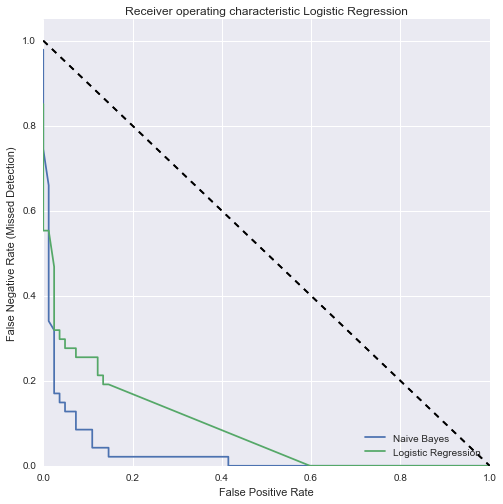

In [110]:
# ("Perceptron", roc_curve(y_test, ann.predict_proba(X_test)[::,1])),
detection_curves = [
    ("Naive Bayes", roc_curve(y_test, nb.predict_proba(X_test)[::,0], pos_label = 0)),
    ("Logistic Regression", roc_curve(y_test, log.predict_proba(X_test)[::,0], pos_label = 0)),
    #("Support Vector Machines", roc_curve(y_test, svm.predict_proba(X_test)[::,0], pos_label = 0)),
    #("K-Nearest Neighbor", roc_curve(y_test, knn.predict_proba(X_test)[::,0], pos_label = 0)),
    #("Random Forest", roc_curve(y_test, rfc.predict_proba(X_test)[::,0], pos_label = 0))
]

draw_detection_curves(detection_curves)

### Precision Recall Curves

AUC is not always area under the curve of a ROC curve. In the situation where you have imbalanced classes, it is often more useful to report AUC for a precision-recall curve. **Precision-recall Curves are well suited when the number of negatives instances is high**.

In Information Retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned. A high area under the cure represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (recall). A system with high recall but low precision returns many results, but most of its predicted labels are incorrect. a system with high precision but low recall, return very few results but most of its predicted labels are correct. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

It is important to note that the precision may not decrease with recall. **Lowering the threshold of classifier may increase True Positives by increasing the number of results**. If the threshold was previously set too high, the new results would be all True Positives, which will increase the precision. Moreover, lowering threshold  we may increase recall by increasing the number of true positives results.

In [394]:
def draw_precisionRecall_curves(precisionRecall_curves):
    plt.figure(figsize=(8,8))
    for rc in precisionRecall_curves:
        precision, recall, thresholds = rc[1]

        # Plot the ROC curve
        #plt.clf()
        plt.plot(recall, precision, label='%s'% rc[0])
#        plt.plot([1, 0], [1, 0], 'k--')
        plt.xlim([0.0, 1.01])
        plt.ylim([0.0, 1.01])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision Recall Curve' )
        plt.legend(loc="lower left")

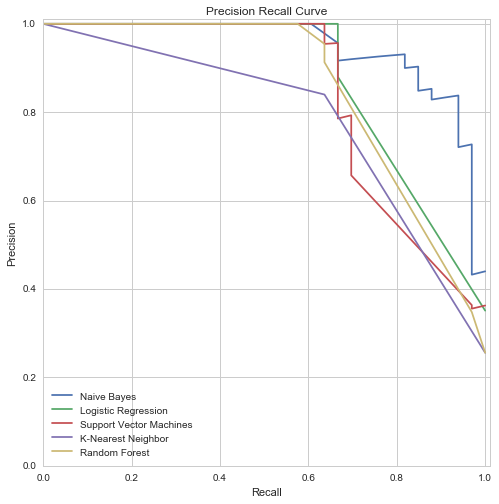

In [395]:
precisionRecall_curves = [
    ("Naive Bayes", precision_recall_curve(y_test, nb.predict_proba(X_test)[::,0], pos_label = 0)),
    ("Logistic Regression", precision_recall_curve(y_test, log.predict_proba(X_test)[::,0], pos_label = 0)),
    ("Support Vector Machines", precision_recall_curve(y_test, svm.predict_proba(X_test)[::,0], pos_label = 0)),
    ("K-Nearest Neighbor", precision_recall_curve(y_test, knn.predict_proba(X_test)[::,0], pos_label = 0)),
    ("Random Forest", precision_recall_curve(y_test, rfc.predict_proba(X_test)[::,0], pos_label = 0))
]

draw_precisionRecall_curves(precisionRecall_curves)

## Cost Curve

## Expected Value

The expected value computation provides a framework that is extremely useful in organizing thinking about data-analytic problems. Specifically, it decomposes data-analytic thinking into:
1. The structure of the problem
2. The elements of the analysis that can be extracted from data
3. The elements of the analysis that need to be acuired from other data sources

The expected value is then the weighted average of the values of the different possible outcomes, where the weight given to each value it its probability of occurrence:
$$EV=\sum\limits_{i=1}^n p(o_{i})* v(o_{i})$$

The probabilities often can be estimated form data, but business values often need to be acquired from other sources.

Instead of computing accuracies for the competing models, we would compute expected values. In many data mining studies, the focus is on minimizing cost rather than maximizing profit, so the signs are reversed. Mathematically, there is no difference. However, it is important to pick one view and be consistent. An easy mistake in formulating const-benefit matrices is to **"double count"** by putting a benefit in one cell and a negative cost for the same thing in another cell. **One should be zero**

In [100]:
#fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test, nb.predict_proba(X_test)[::,0], pos_label = 0)
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, dt.predict_proba(X_test)[::,0], pos_label = 0)
#len(np.unique(np.array(nb.predict_proba(X_test)[:,1]))) == len(threshold_nb)

In [101]:
X_test[2]

u'Aplicar sobre el suelo en peque\xf1os montones o cordones entre las l\xedneas de siembra en los puntos a proteger, siendo conveniente que el suelo est\xe9 h\xfamedo para mayor actividad de estos par\xe1sitos'

In [104]:
np.unique(dt.predict_proba(X_test)[::,0])

array([ 0.        ,  0.02232143,  0.10526316,  0.71428571,  0.875     ,
        0.88888889,  1.        ])

In [102]:
print fpr_dt
print
print 1 - tpr_dt
print
print threshold_dt

[ 0.          0.03529412  0.03529412  0.05882353  0.09411765  0.12941176
  0.97647059  1.        ]

[ 1.          0.34090909  0.27272727  0.13636364  0.04545455  0.02272727
  0.          0.        ]

[ 2.          1.          0.88888889  0.875       0.71428571  0.10526316
  0.02232143  0.        ]


In [77]:
cost_sensitive(fpr, tpr)

[ 9787.23404255  9361.70212766  7872.34042553  7446.80851064  6596.96419305
  5745.90036326  5107.60249092  4256.53866113  3831.00674624  3405.47483134
  3193.92838609  1704.56668396  1705.78619616  1493.02023871  1494.23975091
  1281.47379346  1283.91281785   858.38090296   862.03943954   436.50752465
   440.16606124   227.40010379   254.22937208    41.46341463    47.56097561
    51.2195122     56.09756098    64.63414634    67.07317073    75.6097561
    78.04878049    81.70731707    85.36585366   100.        ]


array([ 9787.23404255,  9361.70212766,  7872.34042553,  7446.80851064,
        6596.96419305,  5745.90036326,  5107.60249092,  4256.53866113,
        3831.00674624,  3405.47483134,  3193.92838609,  1704.56668396,
        1705.78619616,  1493.02023871,  1494.23975091,  1281.47379346,
        1283.91281785,   858.38090296,   862.03943954,   436.50752465,
         440.16606124,   227.40010379,   254.22937208,    41.46341463,
          47.56097561,    51.2195122 ,    56.09756098,    64.63414634,
          67.07317073,    75.6097561 ,    78.04878049,    81.70731707,
          85.36585366,   100.        ])

[ 9787.23404255  9361.70212766  7872.34042553  7446.80851064  6656.72029061
  5805.65646082  5167.35858848  4316.29475869  3890.7628438   3465.23092891
  3313.44058121  1824.07887909  1885.05448884  1672.2885314   1733.26414115
  1520.49818371  1642.44940322  1216.91748832  1399.84431759   974.3124027
  1157.23923197   944.47327452  2285.93668915  2073.17073171  2378.04878049
  2560.97560976  2804.87804878  3231.70731707  3353.65853659  3780.48780488
  3902.43902439  4085.36585366  4268.29268293  5000.        ]
[ 10000.           1794.23975091   1277.89309808   1065.12714063
   1126.10275039   5000.        ]


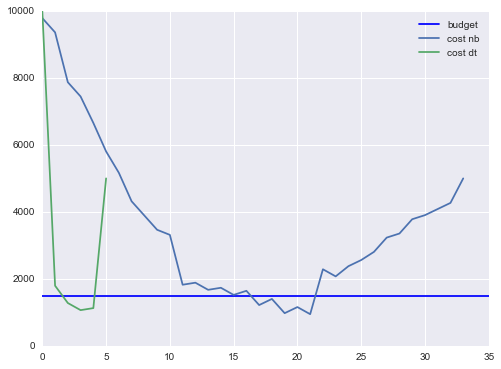

In [95]:
false_positive_cost = 50 # opportunity cost
false_negative_cost = 100 # illegal cost 
budget = 1500

def cost_sensitive(fpr, tpr):
    print (fpr*100) * false_positive_cost + (100-(tpr*100)) * false_negative_cost
    return (fpr*100) * false_positive_cost + (100-(tpr*100)) * false_negative_cost
    
    
plt.figure(figsize = (8,6))
plt.axhline(y=budget, xmin=0, xmax=1, hold=None, label="budget")
plt.plot(cost_sensitive(fpr_nb, tpr_nb), label="cost nb")
plt.plot(cost_sensitive(fpr_dt, tpr_dt), label="cost dt")
plt.legend(loc="top left")

# NER

In [390]:
import xml.etree.ElementTree as ET

In [399]:
import pymysql.cursors

thesauro = []

# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='',
                             db='fitosanitarios',
                             charset='utf8')

try:
    with connection.cursor() as cursor:
        sql = "SELECT * FROM cultivosenfitosanitarios"
        cursor.execute(sql)
        results = cursor.fetchall()
        
        for row in results:
            thesauro.append((row[0],row[1]))
finally:
    connection.close()

In [464]:
import xml.etree.ElementTree as ET
import codecs

forbidden_tagged_sentences = []

tree = ET.parse('/Users/b3j90/Downloads/MAE_v0.9.6/annotations/generales.xml')
root = tree.getroot()

obligations = root.findall('./TAGS/prohibition')
for obligation in obligations:
    forbidden_tagged_sentences.append((obligation.attrib["idcorpus"],obligation.attrib["text"]))#, cultivo.attrib["newReference"]))
    

cultivosAnotados = []

tree = ET.parse('/Users/b3j90/Downloads/MAE_v0.9.6/annotations/generales.xml')
root = tree.getroot()

cultivos = root.findall('./TAGS/cultivo')
for cultivo in cultivos:
    if cultivo.attrib["newReference"] == "no" and not cultivo.attrib["text"] == 'fruta':
        cultivosAnotados.append((cultivo.attrib["idthesaurus"], cultivo.attrib["idcorpus"],cultivo.attrib["text"]))#, cultivo.attrib["newReference"]))

In [429]:
def divide(sentence, n):
    ngrams = []
    lWords = sentence.replace(',','').replace(')','').replace("'",'').split(' ')
    i = 0
    while i < len(lWords)- (n-1):
        j = 0
        word = ''
        while j < n:
            word = word + lWords[i+j] + ' '
            j = j +1
        i = i+1
        #print word
        ngrams.append(word)
    return ngrams

def compare(s1):
    stopwords = ['de', 'la', 'el', 'las', 'los', 'del']
    for t in thesauro:
        if len(s1) > 2:
            if s1.strip().lower() == t[1].lower() or s1.strip().lower()[:-1] == t[1].lower() or s1.strip().lower()[:-2] == t[1].lower()\
            or s1.strip().lower() == t[1].lower()[:-1] or s1.strip().lower() == t[1].lower()[:-2]: # playing with plurals
            
                return t[0] # Identifier

            #else:
            #    score = 0
            #    parts = [set(s1.strip().lower().split(' ')) - set(stopwords)]
            #    partsTax = [set(t[1].lower().split(' ')) - set(stopwords)]
            #    for part in parts:
            #        if part in partsTax or part[:-1] in partsTax:
            #            score += 1
            #    if score != 0:
            #        if  score / len(parts) >= 0.5:
            #            return t[0]

def evaluate(ner):
    for gold in cultivosAnotados:
        if gold[:-1] == ner[:-1]:
            return True

In [468]:
# Accuracy: 0.846 in 13.75 minutes
from time import time

tp = 0
fp = 0
truePositives = []
completed = []

t0 = time()
for cond in forbidden_tagged_sentences:
                    
    grams = divide(cond[1],1)
    if grams is not None:
        for g in grams:
            res = compare(g)
            if res is not None:
                #print "%s, %d" % (cond[0], res)
                ner = ( str(res),cond[0], g)
                if (evaluate(ner)):
                    if (str(res), cond[0]) not in completed:
                        truePositives.append((g, cond[0]))
                        completed.append((str(res), cond[0]))
                        tp += 1
                else:
                    fp += 1

t1 = time()                    

In [469]:
print "Accuracy: %.3f in %.2f minutes" % (tp * 1.0 /(len(cultivosAnotados)), (t1-t0) / 60)
print "Precision: %.3f" % (tp * 1.0 /(tp + fp))
print "Recall: %.3f" % (tp * 1.0 /(tp + len(cultivosAnotados)))

Accuracy: 0.436 in 0.14 minutes
Precision: 0.207
Recall: 0.304


# Global

In [ ]:
def loadGold(f):
    condicionamientosGeneralesAnotados = []
    condicionamientosGeneralesAnotadosSTR = []
    tree = ET.parse('/Users/b3j90/Downloads/MAE_v0.9.6/rulesAnnotated/' + f)
    root = tree.getroot()
    cults = []
    
    obligations = root.findall('./TAGS/obligation')
    for obligation in obligations:
        if obligation.attrib["specific"] == "":
            condicionamientosGeneralesAnotados.append((obligation.attrib["text"]))

    prohibitions = root.findall('./TAGS/prohibition')
    for prohibition in prohibitions:
        if prohibition.attrib["specific"] == "":
            condicionamientosGeneralesAnotados.append((prohibition.attrib["text"]))
        
    propositions = root.findall('./TAGS/proposition')
    for proposition in propositions:
        if proposition.attrib["specific"] == "":
            condicionamientosGeneralesAnotados.append((proposition.attrib["text"]))
        
    permissions = root.findall('./TAGS/permission')
    for permission in permissions:
        if permission.attrib["specific"] == "":
            condicionamientosGeneralesAnotados.append((permission.attrib["text"]))
    
    cultivos = root.findall('./TAGS/cultivo')
    for cultivo in cultivos:
        cults.append((cultivo.attrib["idthesaurus"]))    
        
    for condicionamientosGeneralesAnotado in condicionamientosGeneralesAnotados:
        condicionamientosGeneralesAnotadosSTR.append(condicionamientosGeneralesAnotado.encode('utf-8'))
        
    return condicionamientosGeneralesAnotadosSTR, cults

In [ ]:
import re

def clean(generales):
    cleanD = {}
    if re.search("B.O.E.", generales) is not None:
        cleanD["BOE"] = True
        generales = re.sub("B.O.E.","BOE",generales)
    else:
        cleanD["BOE"] = False
    if re.search("O.M.", generales) is not None:
        cleanD["OM"] = True
        generales = re.sub("O.M.","OM",generales)
    else:
        cleanD["OM"] = False
        
    if re.search("cm\\.", generales) is not None:
        cleanD["CM"] = True
        generales = re.sub("cm\\.", "cm", generales)
    else:
        cleanD["CM"] = False
        
    if re.search("/Qm.", generales) is not None:
        cleanD["QM"] = True
        generales = re.sub("Qm.", "Qm", generales)
    else:
        cleanD["QM"] = False
        
    if re.search("/Ha\.{1}", generales) is not None:
        print "PEPE"
        cleanD["HA"] = True
        generales = re.sub("/Ha.", "/Ha", generales)
    else:
        cleanD["HA"] = False
              
    number =  re.search('[0-9]+ l\.', generales)
    if number is not None:
        print "LITRESS"
        cleanD["LITRES"] = number.group(0)
        generales = re.sub(number.group(0), number.group(0).replace('.',''), generales)
    else:
        cleanD["LITRES"] = None
        
    if re.search("\n", generales) is not None:
        generales = re.sub("\n.+","", generales)
        
    if re.search("# P.S.: ", generales) is not None:
        generales = re.sub("# P.S.: ","", generales)
        
    if re.search("P.S.: ", generales) is not None:
        generales = re.sub("P.S.: ","", generales)
        
        
    if re.search("[a-z] En ", generales) is not None:
        generales = re.sub("[a-z] En ",". En ", generales)
        
    number =  re.search(r'\d+\.\d+', generales)
    if number is not None:
        print "NUMBER"
        cleanD["NUMBER"] = number.group(0)
        generales = re.sub(number.group(0), number.group(0).replace('.',''), generales)
    else:
        cleanD["NUMBER"] = None
        
    number =  re.search(r'\d+\.\d+', generales)
    if number is not None:
        print "NUMBER_2"
        cleanD["NUMBER_2"] = number.group(0)
        generales = re.sub(number.group(0), number.group(0).replace('.',''), generales)
    else:
        cleanD["NUMBER_2"] = None

    return generales, cleanD              


def fix(sentence, cleanD):
    
    if (cleanD["OM"] == True):
        sentence = re.sub("OM", "O.M.", sentence)
        
    if (cleanD["BOE"] == True):
        sentence = re.sub("BOE","B.O.E", sentence)
        
    if (cleanD["CM"] == True):
        sentence = re.sub("cm","cm.", sentence)
        
    if (cleanD["QM"] == True):
        sentence = re.sub("/Qm","/Qm.", sentence)
        
    if (cleanD["HA"] == True):
        sentence = re.sub("/Ha","/Ha.", sentence)
        
    if (cleanD["NUMBER"] is not None):
        sentence = re.sub(cleanD["NUMBER"].replace('.',''),cleanD["NUMBER"], sentence)
        
    if (cleanD["NUMBER_2"] is not None):
        sentence = re.sub(cleanD["NUMBER_2"].replace('.',''),cleanD["NUMBER_2"], sentence)
        
    if (cleanD["LITRES"] is not None):
        sentence = re.sub(cleanD["LITRES"].replace('.',''),cleanD["LITRES"], sentence)      

    return sentence

In [ ]:
def evaluateGenerales(generales, condicionamientosGeneralesAnotados, cultivos, clf, vectorizer):
    fp = 0
    tp = 0
    fn = 0
    #print '+++++++++++++++++++++++++++'
    #for cg in condicionamientosGeneralesAnotados:
    #    print cg
    #print '+++++++++++++++++++++++++++'
    
    countGenerales = 0
    generales, cleanD = clean(generales)
    #print "==========================="
    #print generales
    #print "==========================="

    outlier = False
    sen = 0
    prunedPerDocument = set()
    for general in generales.split('.')[:-1]:
        if not general.startswith('\n') and len(general) > 1:
            sen+=1
            general = fix(general, cleanD)
            #print "general: " + general
            countGenerales += 1
            if general[0] == ' ':
                general = general[1:]
            if general is not None:
                if not general.encode('utf-8') in condicionamientosGeneralesAnotados:
                    if not general in condicionamientosGeneralesAnotados:
                        if general[-2:] == "/H":
                            outlier = True
                            #tp += 1
                        else:
                            print "FASE POSITIVE: " + general
                            #fp +=1
                    else:
                        #NER
                        print "NER_2"
                        prune =  NER(general,3)
                        print "========= CULTIVOS ========="
                        print cultivos
                        prunedPerDocument = prunedPerDocument.union(prune)
                else:
                    #NER + DEONTIC
                    if (clf.predict(vectorizer.transform([general]).toarray())[0] == 0): # prohibited
                        #print "NER_1"
                        prune =  NER(general,3)
                        #print "========= PRUNE ========="
                        #print prune
                        #print "============================"
                        prunedPerDocument = prunedPerDocument.union(prune)
                        #print "========= CULTIVOS ========="
                        #print set(cultivos)
                        #print prunedPerDocument
                        #print "========= CULTIVOS ========="
                        #if len(set(cultivos) & prune) >= 1:
            #print "PRUNED PER DOCUMENT"
            #print prunedPerDocument
            prunedPerDocument = prunedPerDocument - set(['103010102020300', '102010000000000', '104010400000000','102010000000000','103020101030000','103000000000000','104020107000000', '104010700000000', '103010102020400', \
                                                         '102010211010200','105010000000000','104010503000000','102020503000000'])
            tp = len(set(cultivos) & prunedPerDocument)
            fp = len(prunedPerDocument - set(cultivos))
            fn = len(set(cultivos) - prunedPerDocument)    
                

    return tp, fp, fn

## Reproducibility

Ensuring that our work is reproducible is the last and most important step in any analysis. **As a rule, we should't place much weith on a discovery that can't be reproduced**. As such, if our analysis isn't reproducible, we might as wll not have done int.

In [37]:
%install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py

Installed watermark.py. To use it, type:
  %load_ext watermark


/Users/b3j90/anaconda/envs/paper_agriculture/lib/python2.7/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension(s)as a python packages.
  "as a python packages.", UserWarning)


In [471]:
%load_ext watermark

In [474]:
%watermark -a 'Borja Espejo' -nmv --packages numpy,scikit-learn,matplotlib,Seaborn,pandas,PyMySQL

Borja Espejo Wed Nov 18 2015 

CPython 2.7.10
IPython 4.0.0

numpy 1.10.1
scikit-learn 0.17
matplotlib 1.5.0
Seaborn 0.6.0
pandas 0.17.0
PyMySQL 0.6.7

compiler   : GCC 4.2.1 (Apple Inc. build 5577)
system     : Darwin
release    : 12.5.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
